In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
#scikit learn PCA standard scaler

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')#to remove the warnings

In [4]:
df = pd.read_csv('Country-data.csv')

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
#it is recommended to ask for dict whenever we are given data
df_dictionary = pd.read_csv('data-dictionary.csv')
df_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [8]:
df.shape

(167, 10)

In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [14]:
#checking for duplicates

df.loc[df.duplicated()]
#here none implies that there are no duplicates

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


<AxesSubplot:>

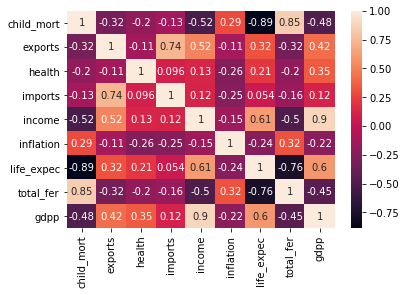

In [15]:
sns.heatmap(df.corr(),annot= True)

In [17]:
#here we have strong corr hence it means duplicacy
#hence we want to reduce these components
#this is where PCA comes into play

In [19]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100


In [ ]:
#list of countries- poverty/gdpp/dev

In [ ]:
#slpit featues and targe

In [20]:
df1 = df.copy()

In [58]:
country= df['country']
country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [21]:
df1= df1.drop('country',axis=1)

In [22]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Scaling Data

In [ ]:
#it is importane to statandize/normalise/scale
# PCA is sensitive and it takes the val with more var 
#this leads to biased data

In [27]:
scaler = StandardScaler()#here scaler is activating
df_scaled= scaler.fit_transform(df1) #here we fit the values 

In [26]:
df_scaled1 = pd.DataFrame(df_scaled,columns=df1.columns) #converting the scaled value into datdframe
df_scaled1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [28]:
#creatig instance of pca
pca= PCA(svd_solver='randomized',random_state=123)

In [30]:
#here the covariance matrix is generated 
#the scaled value is being fed to the pca 
pca.fit(df_scaled1)

PCA(random_state=123, svd_solver='randomized')

In [31]:
pca.components_  #Pc number =no of features #y=b1*val1+b2*val2
#these are the pc components
#each value is a PC value and is the linear combnation of the features

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [32]:
pca.explained_variance_ratio_ #these are the perct of var captured by ach of the pc values

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0, 0.5, 'Variance Raito ')

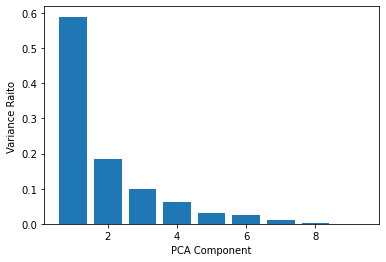

In [36]:
#range(1,len(pca.explained_variance_ratio_)+1) this is the different number o fthe pc components
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel('PCA Component')
plt.ylabel('Variance Raito ')

In [38]:
tab1 = pd.DataFrame({'feature':df1.columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
tab1

,feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


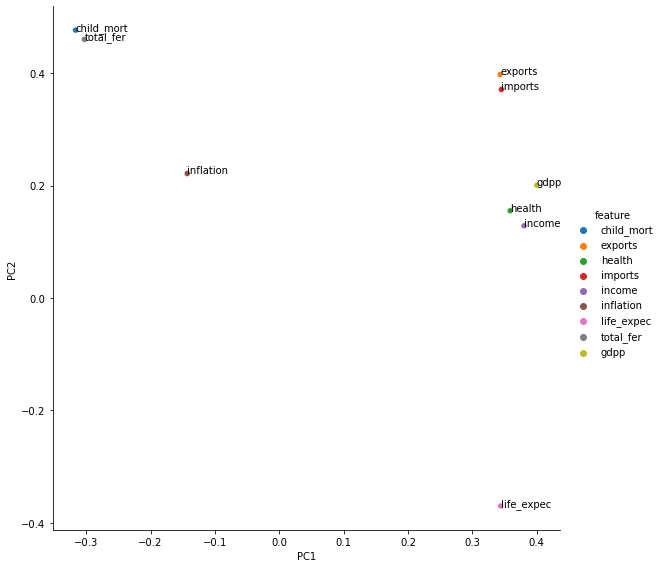

In [45]:
sns.pairplot(data=tab1,x_vars=['PC1'],y_vars=['PC2'],hue='feature',height=8)

#to add the feature name to the point
for i,txt in enumerate(tab1['feature']):
    plt.annotate(txt,(tab1['PC1'][i],tab1['PC2'][i]))
    
#here all the values exceot inflation is being captured by pc1 and pc2 
#the points here are the combination of var captures by pc1 and pc2

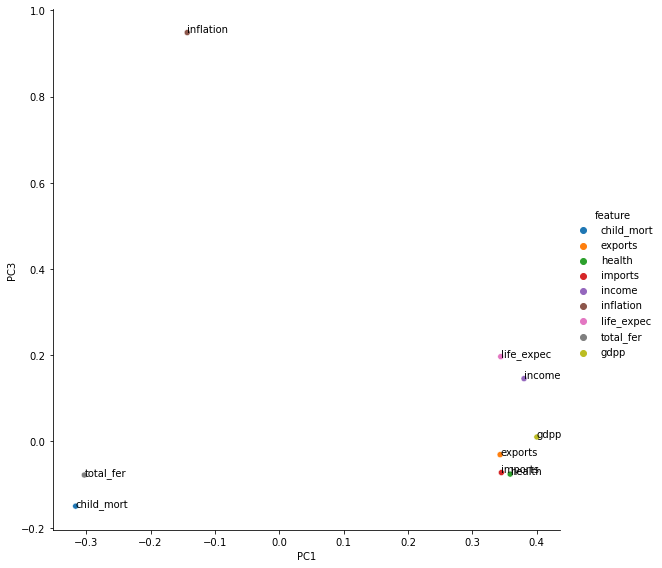

In [44]:
sns.pairplot(data=tab1,x_vars=['PC1'],y_vars=['PC3'],hue='feature',height=8)


for i,txt in enumerate(tab1['feature']):
    plt.annotate(txt,(tab1['PC1'][i],tab1['PC3'][i]))
    
#here we observe that inflation value is being well explained by pc3

In [46]:
#build dataframe fit df_scaled1 on 3 pcs
final_pca= PCA(n_components=3)

In [47]:
finaldf= final_pca.fit_transform(df_scaled1)

In [49]:
finaldf[:5]

array([[-2.63557499,  1.47226739, -0.54948887],
       [-0.02420556, -1.42989187, -0.01412329],
       [-0.4595574 , -0.67549538,  0.95935468],
       [-2.72263028,  2.17233183,  0.60021457],
       [ 0.64859704, -1.02343678, -0.25743004]])

In [52]:
final_df= pd.DataFrame(finaldf,columns=['PC1','PC2','PC3'])
final_df

,PC1,PC2,PC3
0,-2.635575,1.472267,-0.549489
1,-0.024206,-1.429892,-0.014123
2,-0.459557,-0.675495,0.959355
3,-2.722630,2.172332,0.600215
4,0.648597,-1.023437,-0.257430
...,...,...,...
162,-1.175210,-0.275652,-0.667131
163,-0.314228,-0.016266,3.680273
164,-0.594449,-1.076335,0.528875
165,-1.802372,0.588729,1.180851


<AxesSubplot:>

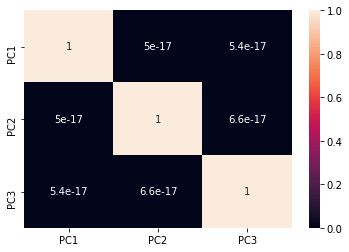

In [54]:
sns.heatmap(final_df.corr(),annot=True)
#here there is no corr between the features

In [55]:
final_df.head()

,PC1,PC2,PC3
0,-2.635575,1.472267,-0.549489
1,-0.024206,-1.429892,-0.014123
2,-0.459557,-0.675495,0.959355
3,-2.722630,2.172332,0.600215
4,0.648597,-1.023437,-0.257430


In [60]:
#concatenate the countries value

final= pd.concat([country,final_df],axis=1)
final.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.635575,1.472267,-0.549489
1,Albania,-0.024206,-1.429892,-0.014123
2,Algeria,-0.459557,-0.675495,0.959355
3,Angola,-2.722630,2.172332,0.600215
4,Antigua and Barbuda,0.648597,-1.023437,-0.257430


In [59]:
country[:5]

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object